# moving Average dan Exponential Smoothing

### Import Library that we use

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error  

In [169]:
# Load dataset
train_data = pd.read_csv('DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('DailyDelhiClimateTest.csv')

In [170]:
train_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [171]:
test_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [172]:
# Convert 'date' column to datetime and set as index
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

In [173]:
# Select the column to forecast ('meantemp')
train = train_data[['meantemp']].copy()
test = test_data[['meantemp']].copy()

In [174]:
# Make sure the data is clean and of numeric type
train['meantemp'] = train['meantemp'].astype(float)
test['meantemp'] = test['meantemp'].astype(float)

In [175]:
# Remove NaN values ​​if any
train.dropna(inplace=True)
test.dropna(inplace=True)

In [176]:
train_cleaned = train.dropna()
test_cleaned = test.dropna()

In [177]:
# Make a copy so that changes do not affect the original dataset
train = train.copy()
test = test.copy()

In [178]:
# Parameter
# Try changing this value 
window_size = 7 
alpha = 0.3   

In [179]:
# Moving Average
train['Moving_Avg'] = train['meantemp'].rolling(window=window_size).mean()
test['Moving_Avg'] = test['meantemp'].rolling(window=window_size).mean()

In [180]:
# Exponential Smoothing
train_model = SimpleExpSmoothing(train['meantemp']).fit(smoothing_level=alpha, optimized=False)
test_model = SimpleExpSmoothing(test['meantemp']).fit(smoothing_level=alpha, optimized=False)


/home/haipigi/.venvs/global_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/haipigi/.venvs/global_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [181]:
train['Exp_Smoothing'] = train_model.fittedvalues
test['Exp_Smoothing'] = test_model.fittedvalues

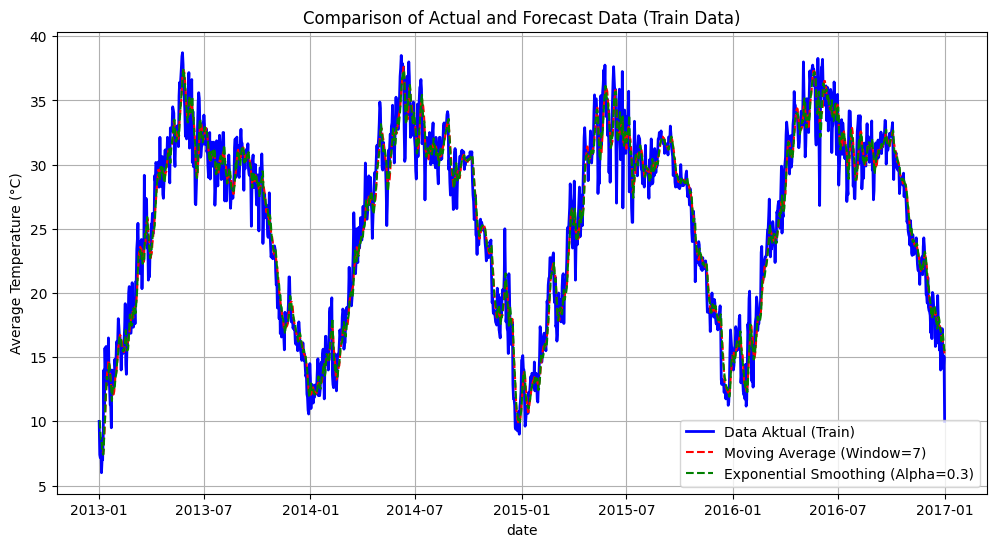

In [182]:
# Plot Actual Data vs Moving Average & Exponential Smoothing on Training Set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['meantemp'], label='Data Aktual (Train)', color='blue', linewidth=2)
plt.plot(train.index, train['Moving_Avg'], label=f'Moving Average (Window={window_size})', color='red', linestyle='dashed')
plt.plot(train.index, train['Exp_Smoothing'], label=f'Exponential Smoothing (Alpha={alpha})', color='green', linestyle='dashed')
plt.title('Comparison of Actual and Forecast Data (Train Data)')
plt.xlabel('date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

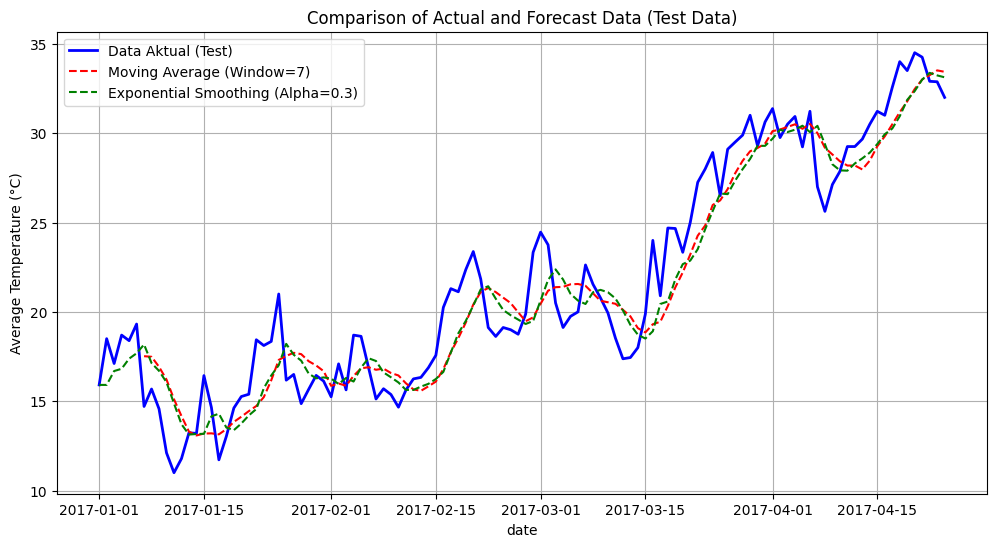

In [183]:
# Plot Data Aktual vs Moving Average & Exponential Smoothing pada Test Set
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['meantemp'], label='Data Aktual (Test)', color='blue', linewidth=2)
plt.plot(test.index, test['Moving_Avg'], label=f'Moving Average (Window={window_size})', color='red', linestyle='dashed')
plt.plot(test.index, test['Exp_Smoothing'], label=f'Exponential Smoothing (Alpha={alpha})', color='green', linestyle='dashed')
plt.title('Comparison of Actual and Forecast Data (Test Data)')
plt.xlabel('date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

In [184]:

# Calculate performance (MSE) on the Test Set
mse_moving_avg_test = mean_squared_error(test['meantemp'][window_size-1:], test['Moving_Avg'][window_size-1:].dropna())
mse_exp_smoothing_test = mean_squared_error(test['meantemp'], test['Exp_Smoothing'])
print(f'MSE Moving Average (Test): {mse_moving_avg_test:.4f}')
print(f'MSE Exponential Smoothing (Test): {mse_exp_smoothing_test:.4f}')

MSE Moving Average (Test): 4.2089
MSE Exponential Smoothing (Test): 4.2315


## Analisis Hasil:

### 1. Training Data:

    - Moving Average (Window=7):

        Garis merah (Moving Average) terlihat lebih halus karena mengambil rata-rata dari 7 titik data sebelumnya.

        Cocok untuk data yang memiliki pola yang stabil.

    - Exponential Smoothing (Alpha=0.3):

        Garis hijau (Exponential Smoothing) lebih responsif terhadap perubahan data karena memberikan bobot lebih tinggi pada data terbaru.

        Cocok untuk data yang memiliki fluktuasi atau tren yang berubah.

### 2.Test Data:

    - Moving Average (Window=7):

        Terlihat lebih stabil dan mengikuti tren data aktual dengan baik.

    - Exponential Smoothing (Alpha=0.3):

        Lebih responsif terhadap perubahan data aktual, tetapi mungkin lebih sensitif terhadap noise.

### MSE (Mean Squared Error):

    Nilai MSE untuk Moving Average dan Exponential Smoothing memberikan gambaran tentang seberapa baik model memprediksi data.

    Semakin kecil nilai MSE, semakin baik performa model.